In [34]:
import numpy as np
import matplotlib.pylab as plt
import imageio.v2 as imageio
import os
import shutil
plt.ioff()
g = -9.81
n = 2
fs = 'xx-large'
directory = '/home/matti/programming/figures_py/video_moto_parab/'

In [42]:
def simul(grav, N_frames, visc, vx0, vy0, x0, y0, Xwind, Ywind):
    t = [0]
    x = [x0]
    y = [y0]
    vx = [vx0]
    vy = [vy0]
    ax = [Xwind]
    ay = [Ywind] 
    
    #todo: se c'e' la viscosita' questa stima e' sbagliata. rifai conticino
    Tf1 = (-vy0 + np.sqrt(vy0 * vy0 - 2 * g * y0)) / g
    Tf2 = (-vy0 - np.sqrt(vy0 * vy0 - 2 * g * y0)) / g
    Tf = max(Tf1,Tf2)
    dt = Tf / (N_frames - 1) #the initial one has to be removed

    gdt = g*dt
    gdt2 = 0.5*grav*dt*dt
    next_y = y[-1] + vy[-1]*dt + gdt2
    while(next_y>0):
        y.append(next_y)
        x.append(x[-1] + vx[-1]*dt)
        vx.append(vx[-1] + ax[-1]*dt)
        vy.append(vy[-1] + gdt + ay[-1]*dt)
        ax.append(Xwind - visc * vx[-1])
        ay.append(Ywind - visc * vy[-1])
        t.append(t[-1] + dt)
        next_y = y[-1] + vy[-1]*dt + gdt2;
        
    print(len(t))
    return t, x, y, vx, vy, ax, ay

In [43]:
Nfr = 100
visc02 = 0.2
vx0=10
vy0=10
h0=0
x0=0

t, x, y, vx, vy, ax, ay = simul(g, Nfr, 0, vx0, vy0, x0, h0, 0, 0)
t1, x1, y1, vx1, vy1, ax1, ay1 = simul(g, Nfr, visc02, vx0, vy0, x0, h0, 0, 0)
t2, x2, y2, vx2, vy2, ax2, ay2 = simul(g, Nfr, visc02, vx0, vy0, x0, h0, -3, 0)
t3, x3, y3, vx3, vy3, ax3, ay3 = simul(g, Nfr, visc02, vx0, vy0, x0, h0, 3, 0)

99
94
94
94


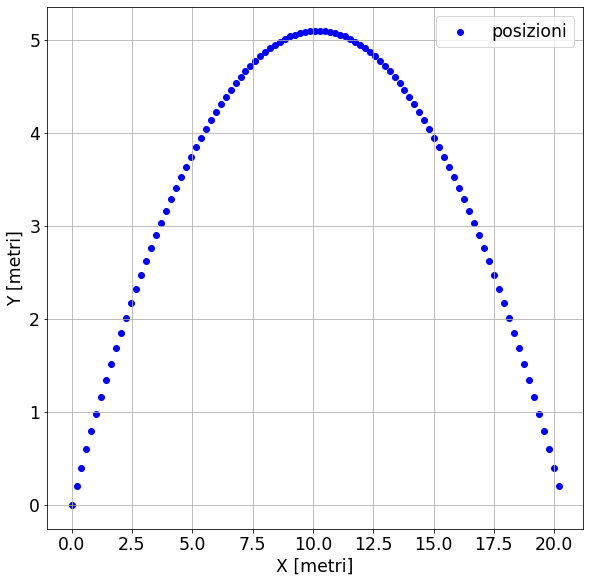

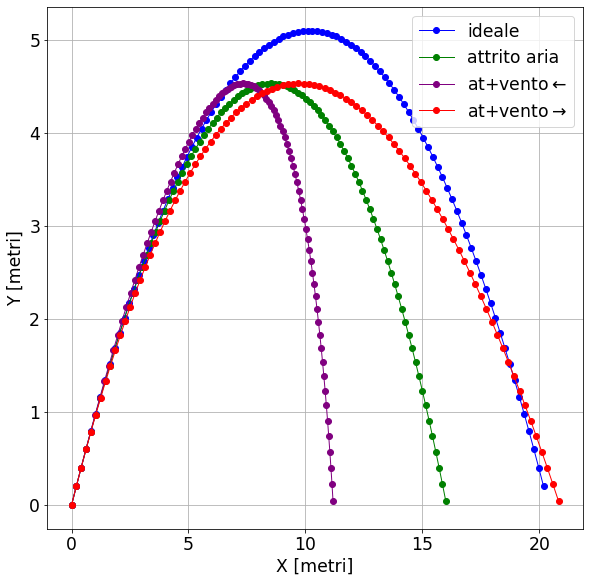

In [37]:
#caso normale
_ = plt.figure(0, figsize=[n*4.8,n*4.8])
_ = plt.scatter(x, y, lw=1, color='blue',  marker='o', label='posizioni')
# _ = plt.quiver(x, y, vx, vy, color='red',scale=150, label='velocità')
_ = plt.xlabel('X [metri]', fontsize=fs)
_ = plt.ylabel('Y [metri]', fontsize=fs)
_ = plt.legend(fontsize=fs)
_ = plt.xticks(fontsize=fs)
_ = plt.yticks(fontsize=fs)
# _ = plt.xlim(-2.5,22.5)
# _ = plt.ylim(-1,6)
_ = plt.grid()
_ = plt.show()

#attrito e vento
_ = plt.figure(1, figsize=[n*4.8,n*4.8])
_ = plt.plot(x, y, lw=1, color='blue',  marker='o', label='ideale')
_ = plt.plot(x1, y1, lw=1, color='green',  marker='o', label='attrito aria')
_ = plt.plot(x2, y2, lw=1, color='purple',  marker='o', label=r'at+vento$\leftarrow$')
_ = plt.plot(x3, y3, lw=1, color='red',  marker='o', label=r'at+vento$\rightarrow$')
# _ = plt.quiver(x3, y3, vx3, vy3, color='black',scale=150)
# _ = plt.quiver(x3, y3, ax3, ay3, color='pink',scale=150)
_ = plt.xlabel('X [metri]', fontsize=fs)
_ = plt.ylabel('Y [metri]', fontsize=fs)
_ = plt.legend(fontsize=fs)
_ = plt.xticks(fontsize=fs)
_ = plt.yticks(fontsize=fs)
_ = plt.grid()
_ = plt.show()
# _ = plt.savefig(directory+'vento_attrito.png', bbox_inches='tight', dpi=300, format='png')


In [20]:
# PER SALVARE LA GIF
filenames = []
n_frames = len(x)

gif_duration = 4
FPS = int(n_frames/gif_duration)
# FPS = 60
# gif_duration = n_frames/FPS

name = str(n_frames)+'p_v'

print("n_frames = %f, gif_dur = %f, fps = %f,       name = "%(n_frames, gif_duration, FPS)+name)


if not os.path.exists(directory+name+'/'):
    os.makedirs(directory+name+'/')

for i in range(0,n_frames):
    fig = plt.figure(i, figsize=[n*4.8,n*4.8])
    _ = plt.scatter(x[i], y[i], lw=1, color='blue',  marker='o', label='posizioni')
    _ = plt.quiver(x[i], y[i], vx[i], vy[i], color='red',scale=150, label='velocità')
    _ = plt.xlabel('X [metri]', fontsize=fs)
    _ = plt.ylabel('Y [metri]', fontsize=fs)
    _ = plt.legend(fontsize=fs)
    _ = plt.xticks(fontsize=fs)
    _ = plt.yticks(fontsize=fs)
    _ = plt.xlim(-2.5,22.5)
    _ = plt.ylim(-1,6)
    _ = plt.grid()
    filenames.append(directory+name+'/'+name+'_'+str(i)+'.jpg')
    _ = plt.savefig(filenames[i], bbox_inches='tight', format='jpg')
    _ = plt.close(fig)
    
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(directory+name+'.gif', images, fps=FPS)
shutil.rmtree(directory+name+'/')

n_frames = 11.000000, gif_dur = 4.000000, fps = 2.000000,       name = 11p_v
